### importing essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv("./Train.csv")

In [4]:
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
df_test=pd.read_csv("./Test.csv")

In [6]:
print(df_train.shape,df_test.shape)

(23856, 18) (15903, 17)


### Normalize the data

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [8]:
Y_train=df_train['MULTIPLE_OFFENSE']

In [9]:
columns=['DATE','MULTIPLE_OFFENSE','INCIDENT_ID']
df_train.drop(columns=columns,axis=1,inplace=True)

In [10]:
incident_id=df_test['INCIDENT_ID'] # used for submission

In [11]:
df_test.drop(columns=['DATE','INCIDENT_ID'],axis=1,inplace=True)

In [12]:
df_test.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34


In [13]:
df_train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43


In [14]:
normalized_df=(df_train-df_train.mean())/df_train.std()

In [15]:
normalized_df_test=(df_test-df_test.mean())/df_test.std()

In [16]:
normalized_df_test.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,-0.331481,0.346538,0.689141,0.912994,0.28091,-0.019072,-0.223789,-0.670665,0.066372,-0.286542,-0.353935,NaN,-0.479795,1.076964,-1.253581
1,-0.331481,1.265846,1.284086,-1.104095,0.28091,0.205591,-1.002090,2.048068,0.793816,-0.286542,1.171179,-1.109012,-2.662153,-0.994943,0.069444


In [17]:
normalized_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,-0.336018,0.735474,0.618599,-0.773174,-0.741487,-0.258103,0.289416,0.018952,0.789559,-0.21871,-0.354223,0.022210,0.245047,-1.008707,0.302290
1,0.358553,0.801090,0.816814,-1.452367,-1.250886,1.083651,3.123057,0.018952,0.789559,-0.21871,0.312205,0.022210,0.643638,1.601155,0.063821
2,-0.336018,-1.429847,-1.495693,-0.433578,1.296112,-1.152606,-1.256207,0.707115,-1.412075,-0.21871,-0.354223,0.022210,0.897286,0.469445,0.063821
3,-0.336018,0.538627,0.486456,-0.773174,-0.741487,0.189148,-0.998603,0.018952,0.789559,-0.21871,0.451940,0.022210,-0.479664,-1.008707,0.063821
4,-0.336018,0.538627,0.486456,-0.773174,-0.741487,0.412774,-0.483396,-0.669211,0.055681,-0.21871,-0.354223,-0.834156,0.969758,-1.008707,1.136931


### filling tha NaN values

In [18]:
normalized_df=normalized_df.fillna(normalized_df.mean())
normalized_df_test=normalized_df_test.fillna(normalized_df_test.mean())

In [19]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     23856 non-null  float64
 1   X_2     23856 non-null  float64
 2   X_3     23856 non-null  float64
 3   X_4     23856 non-null  float64
 4   X_5     23856 non-null  float64
 5   X_6     23856 non-null  float64
 6   X_7     23856 non-null  float64
 7   X_8     23856 non-null  float64
 8   X_9     23856 non-null  float64
 9   X_10    23856 non-null  float64
 10  X_11    23856 non-null  float64
 11  X_12    23856 non-null  float64
 12  X_13    23856 non-null  float64
 13  X_14    23856 non-null  float64
 14  X_15    23856 non-null  float64
dtypes: float64(15)
memory usage: 2.7 MB


In [20]:
normalized_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     15903 non-null  float64
 1   X_2     15903 non-null  float64
 2   X_3     15903 non-null  float64
 3   X_4     15903 non-null  float64
 4   X_5     15903 non-null  float64
 5   X_6     15903 non-null  float64
 6   X_7     15903 non-null  float64
 7   X_8     15903 non-null  float64
 8   X_9     15903 non-null  float64
 9   X_10    15903 non-null  float64
 10  X_11    15903 non-null  float64
 11  X_12    15903 non-null  float64
 12  X_13    15903 non-null  float64
 13  X_14    15903 non-null  float64
 14  X_15    15903 non-null  float64
dtypes: float64(15)
memory usage: 1.8 MB


In [21]:
X_train=normalized_df.values
Y_train=Y_train
X_test=normalized_df_test.values

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,precision_score,recall_score

### just a test with svm and calculating cross validation score, precision,recall,confusion matrix 
- for comparison with other model

In [23]:
svm_=svm.SVC()

In [24]:
svm_.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
prediction=svm_.predict(X_test)

In [26]:
cvs=cross_val_score(svm_,X_train,Y_train,scoring='accuracy',cv=15).mean()
print("Cross validation score on training data : %.2f"%(cvs))

Cross validation score on training data : 0.97


In [27]:
temp=pd.DataFrame({"INCIDENT_ID":incident_id,'MULTIPLE_OFFENSE':prediction})
temp.to_csv("svm_.csv",index=False)

### confusion matrix,precision,recall on training data

In [28]:
y_train_predict=svm_.predict(X_train)

In [29]:
cm=confusion_matrix(Y_train,y_train_predict)

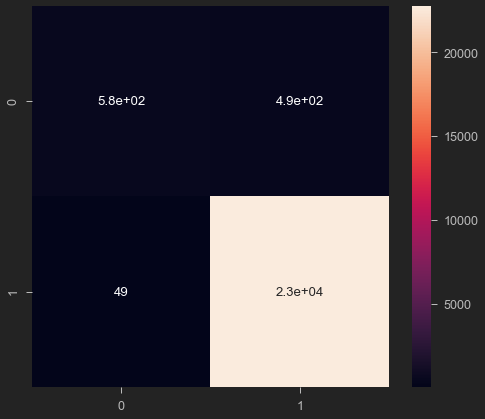

In [30]:
sns.heatmap(cm,annot=True)

In [31]:
print("precision_score : %.2f"%(precision_score(Y_train,y_train_predict)))
print("recall_score : %.2f"%(recall_score(Y_train,y_train_predict)))

precision_score : 0.98
recall_score : 1.00


### Grid_Search

In [32]:
names = [
            "SVM",
            "Logistic Regression",
            "Random Forest",
            #"KNN"
         ]

classifiers = [
    svm.SVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    #KNeighborsClassifier()
    ]


params = [
    {
        'regressor':[svm.SVC()],
        'regressor__kernel':['linear','rbf','poly','sigmoid'],
        'regressor__C':[0.1,0.2,0.5,1.0,2.0,5.0]
    },
    
    {
        'regressor':[LogisticRegression()],
        'regressor__C':[0.1,0.2,0.5,1.0,2.0,5.0]
        
    }
    ,
    {
        'regressor':[RandomForestClassifier()],
        'regressor__criterion':['entropy','gini'],
        'regressor__max_depth':[10,14,16,18]
        
    },
#     {
#         'regressor':[KNeighborsClassifier()],
#         'regressor__n_neighbors':[10,12,15,20,25],
#         'regressor__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
        
#     }
        
]

In [33]:
for name, classifier, params in zip(names, classifiers, params):
    clf_pipe = Pipeline([
        ('regressor', classifier),
    ])
    gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1)
    clf = gs_clf.fit(X_train, Y_train)

In [34]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('regressor',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=18, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [35]:
clf.best_score_

0.9927062215610766

In [36]:
prediction=clf.predict(X_test)

In [37]:
temp=pd.DataFrame({"INCIDENT_ID":incident_id,'MULTIPLE_OFFENSE':prediction})
temp.to_csv("grid_search.csv",index=False)

### 94% Test Accuracy